## Tarea 3 Procesamiento de Imagenes 

Curso: MDS 112 Sección 1

Alumno: Esteban Hernández

> Ejecutar el código proceduralmente, la imagen se asume se encuentra en el mismo directorio donde se ejecuta el código

>Se ha utilizado Python 3.11.3 para la ejecución, con a las las librerías: 
>- cv2 
>- numpy 
>- matplotlib

### Importe de modulos y Definicion de Funciones

In [1]:
import cv2, numpy as np
import matplotlib.pyplot as plt
import numpy.matlib

cmap="gray"

def mk_plots(x=10,y=15,nr=1,nc=3,dpi=120,axis="on"):
    fig, ax = plt.subplots(nrows=nr, ncols=nc, dpi=dpi)
    fig.set_size_inches(x,y)

    if nr != 1: [[x.axis(axis) for x in y] for y in ax]
    else: [x.axis(axis) for x in ax]
    
    return ax

to_fft = lambda img: np.fft.fftshift(np.fft.fft2(img))
to_img = lambda fft: np.fft.ifft2(np.fft.fftshift(fft))

#Utilizar Solo para imshow
normalize = lambda matrix,factor=1 : cv2.normalize(np.log(np.abs(matrix)+factor), None, 0.0, 1.0, cv2.NORM_MINMAX)
#normalize = lambda matrix,factor=1 : np.log(np.abs(matrix)+factor)

### Parte I

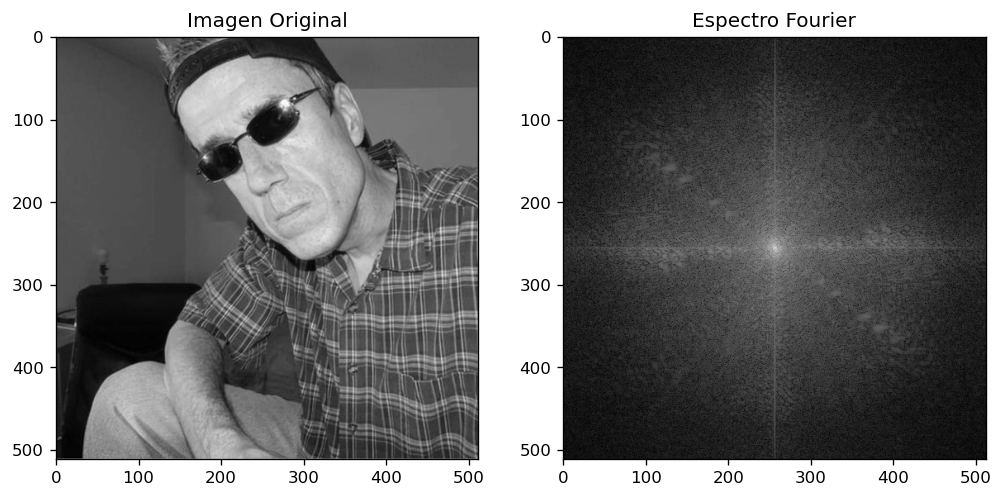

(512, 512)

In [2]:
img_1 = cv2.normalize( 
        cv2.cvtColor( 
            cv2.imread('img.jpg')
            ,cv2.COLOR_BGR2GRAY
        ).astype('float')
        ,None, 0.0, 1.0, cv2.NORM_MINMAX)
fft_img_1 = to_fft(img_1)
ax = mk_plots(nc=2)

ax[0].imshow(img_1,cmap)
ax[0].set_title("Imagen Original")

ax[1].imshow(normalize(fft_img_1),cmap)
ax[1].set_title("Espectro Fourier")

plt.show()
img_1.shape

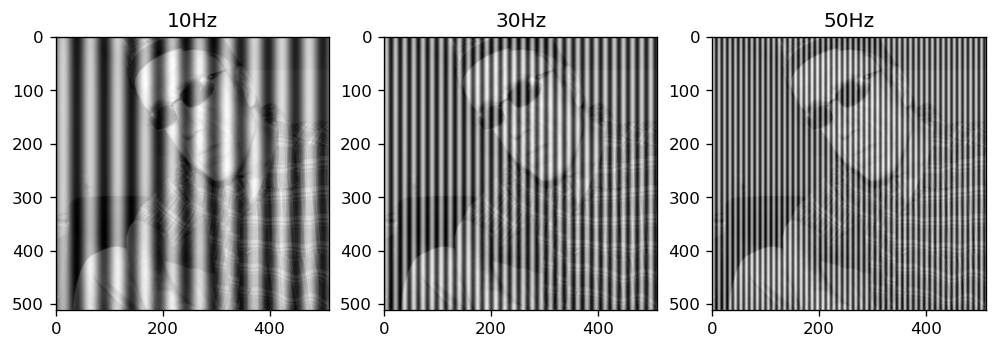

In [3]:
#Se crean imagenes con ruido frecuencial

V = np.linspace(0,1,num=512)
pi = np.pi
A = 1

img_10hz, img_30hz, img_50hz = [ 
    np.add(np.matlib.repmat(A*np.sin(2*pi*Hz*V),512,1),img_1)
    for Hz in [10,30,50] 
]

ruido_dict = {
    "10Hz"  :img_10hz,
    "30Hz"  :img_30hz, 
    "50Hz"  :img_50hz
}
ax = mk_plots()

for idx, _freq in enumerate(ruido_dict.keys()):
    ax[idx].imshow(ruido_dict[_freq],cmap="gray")
    ax[idx].set_title(_freq)

plt.show()

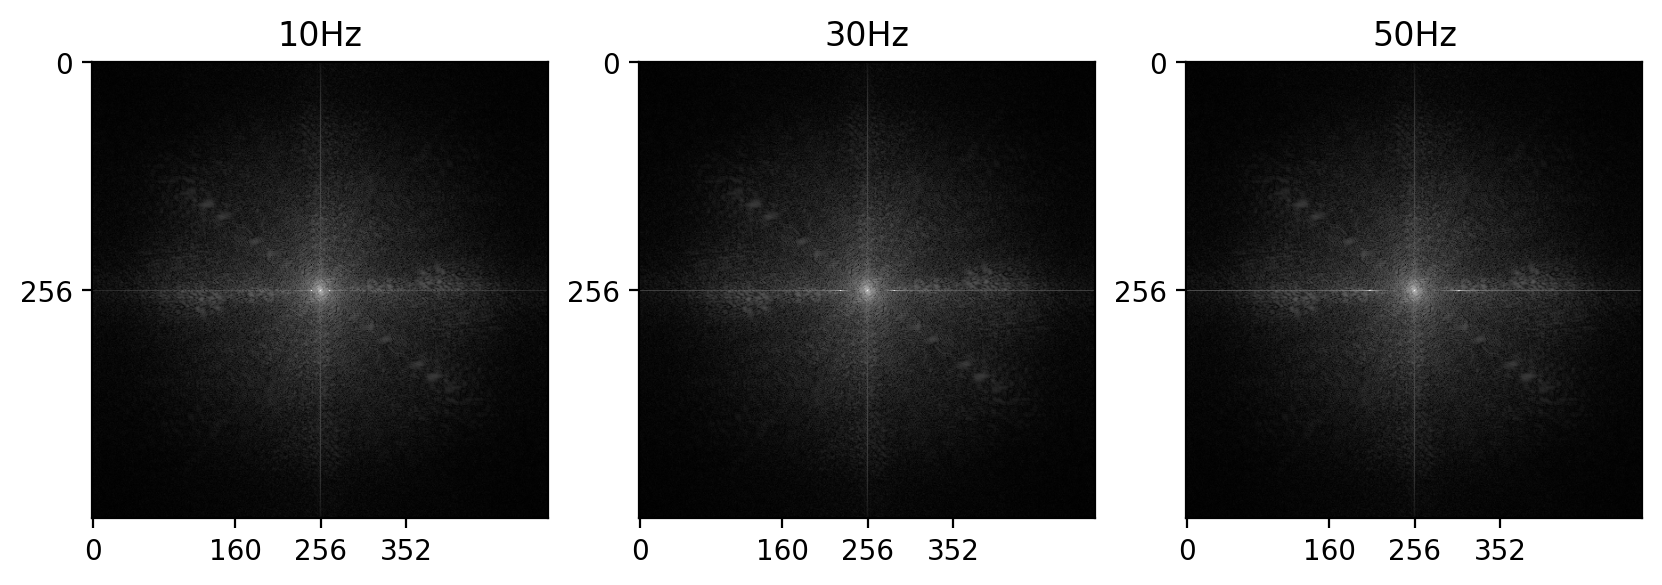

In [16]:
ax = mk_plots(dpi=300)

plt.setp(ax, xticks=[0,160,256,352,512], yticks=[0,256,512])
fft_dict = dict()

for freq in ruido_dict:
    fft_dict[freq] = to_fft(ruido_dict[freq])
    
for idx, _freq in enumerate(ruido_dict.keys()):
    ax[idx].imshow(normalize(fft_dict[_freq],factor=10),cmap="gray")
    ax[idx].set_title(_freq)
    
plt.show()

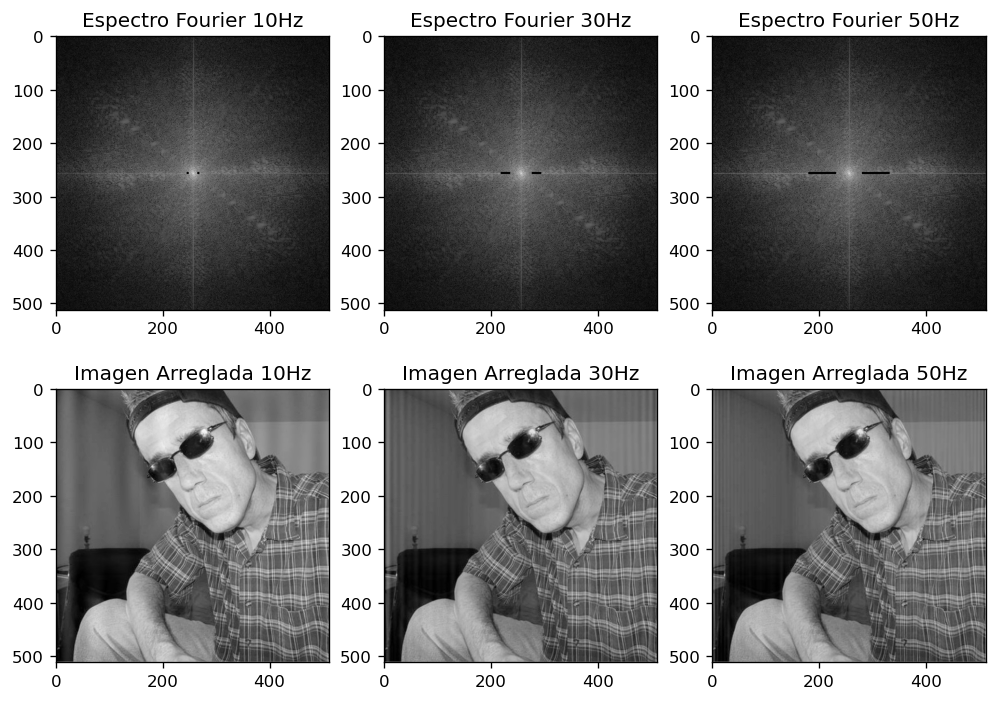

In [5]:
for freq in ruido_dict:
    fft_dict[freq] = to_fft(ruido_dict[freq])

largo = 5
centro = 10
fft_dict["10Hz"][int(256-(largo-1)/2):int(256+(largo-1)/2), int(256-centro-(largo-1)/2):int(256-centro+(largo-1)/2)] = 0
fft_dict["10Hz"][int(256-(largo-1)/2):int(256+(largo-1)/2), int(256+centro-(largo-1)/2):int(256+centro+(largo-1)/2)] = 0

largo = 8
centro = 29
fft_dict["30Hz"][256-2:256+2, 255-centro-largo:257-centro+largo] = 0
fft_dict["30Hz"][256-2:256+2, 255+centro-largo:257+centro+largo] = 0

largo = 25
centro = 50
fft_dict["50Hz"][256-2:256+2, 255-centro-largo:257-centro+largo] = 0
fft_dict["50Hz"][256-2:256+2, 255+centro-largo:257+centro+largo] = 0

ax = mk_plots(nr=2,nc=3,y=7)

for idx, _freq in enumerate(ruido_dict.keys()):
    ax[0][idx].imshow(normalize(fft_dict[_freq]),cmap)
    ax[0][idx].set_title(f"Espectro Fourier {_freq}")

    ax[1][idx].imshow(normalize(to_img(fft_dict[_freq])),cmap)
    ax[1][idx].set_title(f"Imagen Arreglada {_freq}")

print()
plt.show()

### Parte II

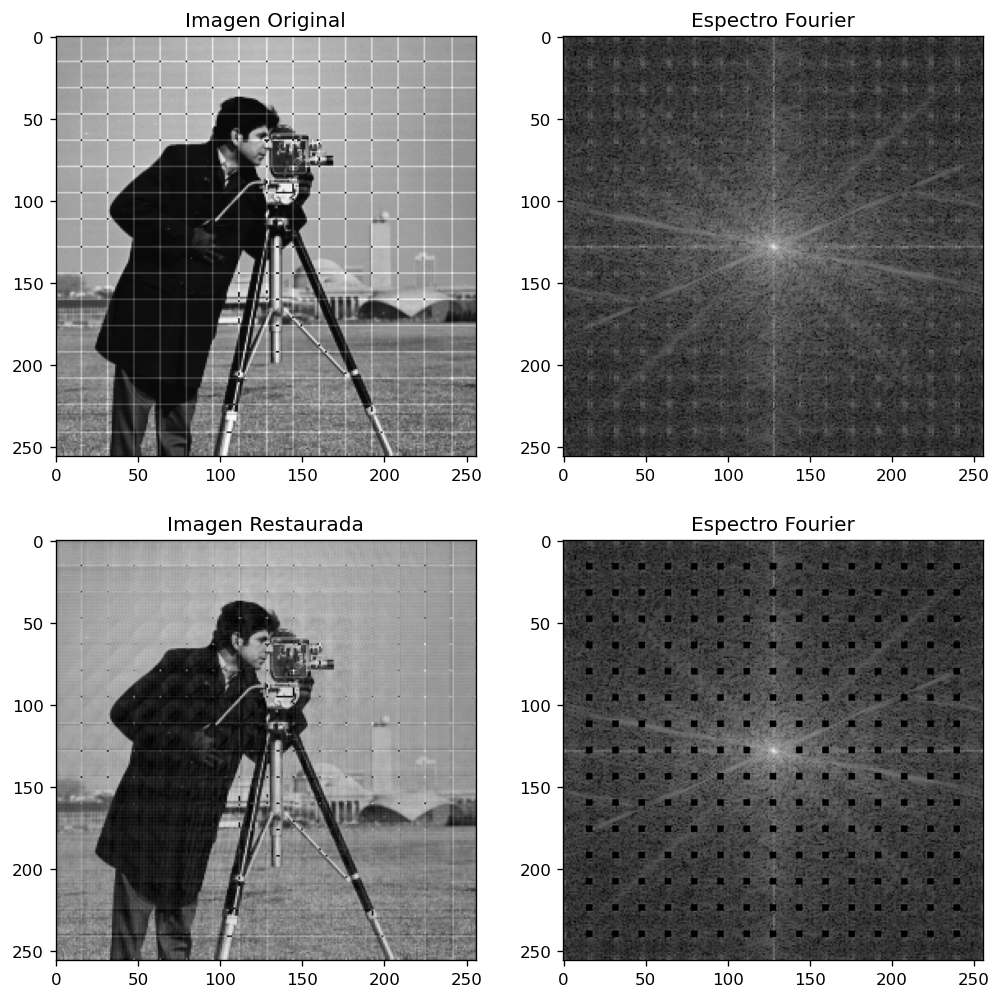

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
img = cv2.imread('cameraman.png',cv2.IMREAD_GRAYSCALE)
m = img.shape[0]
delta = 15
V = np.fix(np.linspace(delta,m-delta,delta)).astype('uint8')
img[V,:] = img[V,:]+50
img[:,V] = img[:,V]+50
######################################################################
fft_img = to_fft(img)
normalize_2 = lambda matrix: normalize(matrix,factor=2**8)
######################################################################

ax = mk_plots(nr=2,nc=2, y=10)

ax[0][0].set_title("Imagen Original")
ax[0][0].imshow(img,cmap)

ax[0][1].set_title("Espectro Fourier")
ax[0][1].imshow(normalize_2(fft_img),cmap)

for centro_x in range(16,256,16):
    for centro_y in range(16,256,16):
        if(centro_x == 128 and centro_y == 128):
            continue
        fft_img[centro_y-largo:centro_y+largo,centro_x-largo:centro_x+largo] = 0

ax[1][0].set_title("Imagen Restaurada")
ax[1][0].imshow(normalize_2(to_img(fft_img)),cmap)

ax[1][1].set_title("Espectro Fourier")
ax[1][1].imshow(normalize_2(fft_img),cmap)

plt.show()